In [2]:
!pip install ISLP==0.3.19

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import (DecisionTreeClassifier as DTC,
               DecisionTreeRegressor as DTR,
               plot_tree, export_text)
from sklearn.metrics import (accuracy_score, log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV

In [4]:
College = load_data('College')
College = College.replace({
                'Yes': 1,
                'No': 0
            })
College

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [5]:

X = College[College.columns.difference(['Apps'])]
y = College['Apps']
X

,Accept,Books,Enroll,Expend,F.Undergrad,Grad.Rate,Outstate,P.Undergrad,Personal,PhD,Private,Room.Board,S.F.Ratio,Terminal,Top10perc,Top25perc,perc.alumni
0,1232,450,721,7041,2885,60,7440,537,2200,70,1,3300,18.1,78,23,52,12
1,1924,750,512,10527,2683,56,12280,1227,1500,29,1,6450,12.2,30,16,29,16
2,1097,400,336,8735,1036,54,11250,99,1165,53,1,3750,12.9,66,22,50,30
3,349,450,137,19016,510,59,12960,63,875,92,1,5450,7.7,97,60,89,37
4,146,800,55,10922,249,15,7560,869,1500,76,1,4120,11.9,72,16,44,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,1515,500,543,4469,3089,40,6797,2029,1200,60,0,3900,21.0,60,4,26,14
773,1805,600,695,9189,2849,83,11520,1107,1250,73,1,4960,13.3,75,24,47,31
774,1915,617,695,8323,2793,49,6900,166,781,67,1,4200,14.4,75,34,61,20
775,2453,630,1317,40386,5217,99,19840,83,2115,96,1,6510,5.8,96,95,99,49


# 5a.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=27)
X_train

,Accept,Books,Enroll,Expend,F.Undergrad,Grad.Rate,Outstate,P.Undergrad,Personal,PhD,Private,Room.Board,S.F.Ratio,Terminal,Top10perc,Top25perc,perc.alumni
131,411,450,186,7315,1692,77,12224,562,1000,63,1,4440,11.5,87,23,51,32
331,1005,500,363,8024,1363,72,13900,74,900,75,1,4300,14.0,81,16,37,32
315,562,600,363,5177,925,53,5950,605,1300,67,1,2890,14.6,72,21,55,35
175,1006,600,274,14634,1028,78,15036,13,600,90,1,4056,10.6,94,35,63,46
13,1080,400,385,9305,1306,68,12572,28,400,79,1,4552,15.3,87,44,73,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,381,600,174,7863,738,51,9600,55,750,55,1,4550,13.3,94,10,43,43
752,920,530,548,11916,2200,85,11480,56,1400,81,1,4200,12.7,83,56,84,40
543,362,385,181,10938,1501,49,8600,353,665,48,1,3550,15.4,48,15,32,9
696,1966,376,1030,6254,6038,65,6704,579,1750,78,0,2592,21.0,78,9,32,17


# 5b.

In [7]:

linear_model = sm.OLS(y_train, X_train)
linear_model = linear_model.fit()
y_pred = linear_model.predict(X_test)
print("Test MSE = ", mean_squared_error(y_test,y_pred))

Test MSE =  1339428.9473367126


# 5c.

In [8]:

clf = RidgeCV(cv=10).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Test MSE with Ridge regression = ", mean_squared_error(y_test,y_pred))
print("Lamda = ", clf.alpha_)

Test MSE with Ridge regression =  1334324.1857907998
Lamda =  1.0


# 5d.

In [9]:

clf = LassoCV(cv=10, random_state=27).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Test MSE with Lasso regression = ", mean_squared_error(y_test,y_pred))
print(clf.alpha_)
for coef in clf.coef_:
  if coef != 0: print(coef)

Test MSE with Lasso regression =  1481190.505953948
25091.417190041753
1.53303137746721
0.10787334181820685
-0.03145755435206471
-0.0492791293460492
-0.0010806637510432518
-0.003561492296025057
0.06889449824012095


# 5e.

Test MSE =  13331044.884612711 , with M = 10


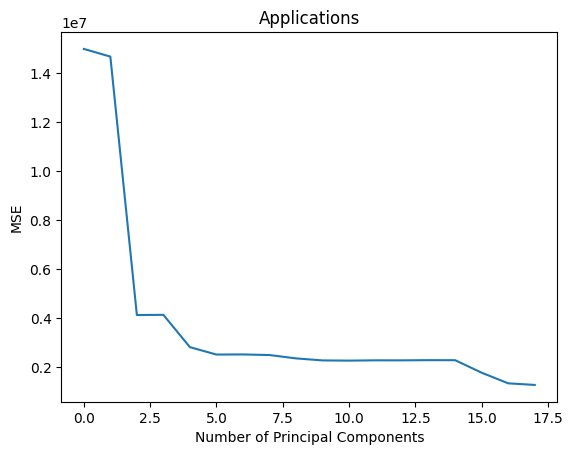

In [10]:

pca = PCA()
X_reduced = pca.fit_transform(scale(X))
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
regr = LinearRegression()
mse = []
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()
mse.append(score)
for i in np.arange(1, 18):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Applications')

pca = PCA(n_components=10)
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)
pred = regr.predict(X_reduced_test)
print("Test MSE = ",mean_squared_error(y_test, pred), ", with M = 10")

# 7a.

In [11]:
Carseats = load_data('Carseats')
Carseats = Carseats.replace({
                'Yes': 1,
                'No': 0,
                'Bad':0,
                'Medium':1,
                'Good':2
            })
y = Carseats.Sales
X = Carseats[Carseats.columns.difference(['Sales'])]
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,1,55,11,0,1
397,7.41,162,26,12,368,159,1,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=27)
X_train, X_test, y_train, y_test

(     Advertising  Age  CompPrice  Education  Income  Population  Price  \
 142            0   77        124         15      84         300    104   
 264            5   31        128         15      29         324    159   
 7             15   67        136         10      81         425    120   
 23             0   79        121         10      31         292    109   
 186            0   46        120         17      51          93     86   
 ..           ...  ...        ...        ...     ...         ...    ...   
 312            5   38        137         10     117         337    135   
 31            16   44        136         18      58         241    131   
 328            1   55        117         11      66          65    111   
 184            7   60        132         11      33          35     97   
 19            16   69        129         12      76          58    121   
 
     ShelveLoc US Urban  
 142         1  0     1  
 264         2  1     1  
 7           2  1   

# 7b.

[Text(0.5, 0.9166666666666666, 'CompPrice <= 2.45\nsquared_error = 0.667\nsamples = 150\nvalue = 1.0'), Text(0.4230769230769231, 0.75, 'squared_error = 0.0\nsamples = 50\nvalue = 0.0'), Text(0.5769230769230769, 0.75, 'Education <= 1.75\nsquared_error = 0.25\nsamples = 100\nvalue = 1.5'), Text(0.3076923076923077, 0.5833333333333334, 'CompPrice <= 4.95\nsquared_error = 0.084\nsamples = 54\nvalue = 1.093'), Text(0.15384615384615385, 0.4166666666666667, 'Education <= 1.65\nsquared_error = 0.02\nsamples = 48\nvalue = 1.021'), Text(0.07692307692307693, 0.25, 'squared_error = 0.0\nsamples = 47\nvalue = 1.0'), Text(0.23076923076923078, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 2.0'), Text(0.46153846153846156, 0.4166666666666667, 'Education <= 1.55\nsquared_error = 0.222\nsamples = 6\nvalue = 1.667'), Text(0.38461538461538464, 0.25, 'squared_error = 0.0\nsamples = 3\nvalue = 2.0'), Text(0.5384615384615384, 0.25, 'Advertising <= 6.95\nsquared_error = 0.222\nsamples = 3\nvalue = 1.333'), T

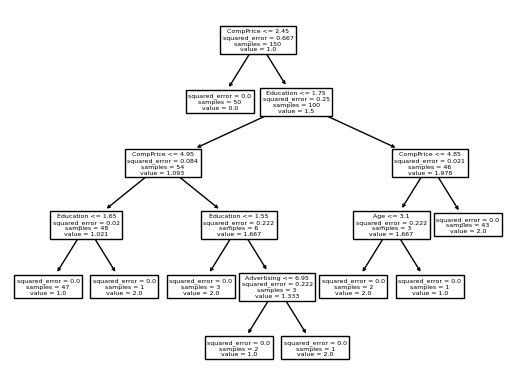

In [13]:


regr = DecisionTreeRegressor(random_state=27, criterion= "squared_error")
regr_tree = regr.fit(X_train,y_train)
y_pred = regr_tree.predict(X_test)


iris = load_iris()
clf = regr_tree.fit(iris.data, iris.target)
print(tree.plot_tree(clf, feature_names=X_train.columns))
print("Test MSE = ",mean_squared_error(y_test, y_pred))

## Education, CompPrice and Age are more decisive in the Regression tree then other elements. and the test MSE is 4.07

# 7c.

In [14]:
regr = DecisionTreeRegressor(random_state=27, criterion= "squared_error")
depth = []
for i in range(3,20):
    # Perform 5-fold cross validation
    scores = cross_val_score(regr, X_train, y_train, cv=5)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.2615629975511424), (4, 0.2615629975511424), (5, 0.2615629975511424), (6, 0.2615629975511424), (7, 0.2615629975511424), (8, 0.2615629975511424), (9, 0.2615629975511424), (10, 0.2615629975511424), (11, 0.2615629975511424), (12, 0.2615629975511424), (13, 0.2615629975511424), (14, 0.2615629975511424), (15, 0.2615629975511424), (16, 0.2615629975511424), (17, 0.2615629975511424), (18, 0.2615629975511424), (19, 0.2615629975511424)]


In [15]:
path = regr.cost_complexity_pruning_path(X_train, y_train)
alphas, impurities = path.ccp_alphas, path.impurities

MSE=[]
mean, std = [], []
for i in alphas:
  pruned_tree = DecisionTreeRegressor(ccp_alpha=i, random_state=27)
  pruned_tree=pruned_tree.fit(X_train, y_train)
  y_pred = pruned_tree.predict(X_test)
  MSE.append(mean_squared_error(y_test, y_pred))
# keep a record of the values of alpha, mean accuracy rate, standard deviation of accuracies
eva_df = pd.DataFrame({'alpha': alphas, 'MSE': MSE})
eva_df = eva_df.sort_values(['MSE'], ascending = True)
eva_df.head(10)

,alpha,MSE
212,0.007140,3.723460
213,0.007333,3.723460
214,0.007367,3.723460
204,0.005406,3.757650
203,0.005274,3.757650
286,0.063162,3.762140
215,0.007402,3.785709
180,0.002755,3.792006
179,0.002695,3.802292
287,0.068149,3.807992


Use alpha = 0.007140 to prune the tree

[Text(0.4, 0.875, 'CompPrice <= 2.45\nsquared_error = 0.667\nsamples = 150\nvalue = 1.0'), Text(0.2, 0.625, 'squared_error = 0.0\nsamples = 50\nvalue = 0.0'), Text(0.6, 0.625, 'Education <= 1.75\nsquared_error = 0.25\nsamples = 100\nvalue = 1.5'), Text(0.4, 0.375, 'CompPrice <= 4.95\nsquared_error = 0.084\nsamples = 54\nvalue = 1.093'), Text(0.2, 0.125, 'squared_error = 0.02\nsamples = 48\nvalue = 1.021'), Text(0.6, 0.125, 'squared_error = 0.222\nsamples = 6\nvalue = 1.667'), Text(0.8, 0.375, 'squared_error = 0.021\nsamples = 46\nvalue = 1.978')]
Test MSE =  3.8324055714409724


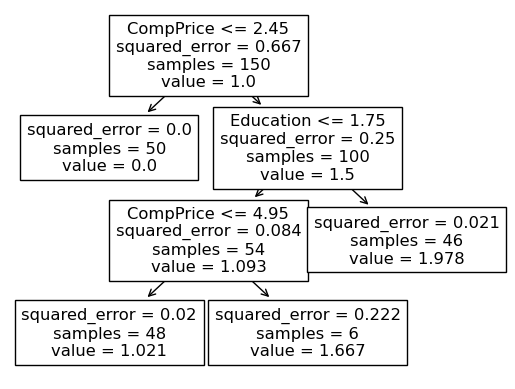

In [16]:
pruned_tree = DecisionTreeRegressor(ccp_alpha=0.007140, random_state=27)
pruned_tree=pruned_tree.fit(X_train, y_train)
y_pred = pruned_tree.predict(X_test)

iris = load_iris()
clf = pruned_tree.fit(iris.data, iris.target)
print(tree.plot_tree(clf, feature_names=X_train.columns))
print("Test MSE = ",mean_squared_error(y_test, y_pred))



## After the pruning, the MSE decreases from 4.07 to 3.83, so pruning the tree improves the test error rate

# 7d.

In [17]:
bag = RF(max_features=X_train.shape[1], random_state=27) # number of features
bag.fit(X_train, y_train)

y_pred = bag.predict(X_test)
print("Test MSE = ",mean_squared_error(y_test, y_pred))
feature_imp = pd.DataFrame(
    {'importance':bag.feature_importances_}, index=X_train.columns)
feature_imp.sort_values(by='importance', ascending=False)

Test MSE =  2.2622959076250004


,importance
Price,0.314057
ShelveLoc,0.283149
CompPrice,0.099923
Age,0.093341
Advertising,0.067708
Income,0.060653
Population,0.040094
Education,0.029891
Urban,0.005884
US,0.005301


## The test MSE = 2.26, From the table we can see Price is the most important variable

# 7e.

In [18]:
rf = RF(max_features=5, random_state=27).fit(X_train, y_train) # number of features
y_pred = rf.predict(X_test)
print("m = 5, Test MSE = ",np.mean((y_test - y_pred)**2))

feature_imp = pd.DataFrame(
    {'importance':rf.feature_importances_}, index=X_train.columns)
feature_imp.sort_values(by='importance', ascending=False)

m = 5, Test MSE =  2.423036500375


,importance
Price,0.286165
ShelveLoc,0.252716
Age,0.108962
CompPrice,0.095250
Income,0.075727
Advertising,0.073013
Population,0.053745
Education,0.039125
US,0.008781
Urban,0.006517


## When m=5, test MSE = 2.42, and the most important variable is sill the Price.

In [19]:
for i in range(1,11):
  rf = RF(max_features=i, random_state=27).fit(X_train, y_train) # number of features
  y_pred = rf.predict(X_test)
  print("m = ",i,", Test MSE = ",np.mean((y_test - y_pred)**2))



m =  1 , Test MSE =  3.898039745749999
m =  2 , Test MSE =  3.3381320094999993
m =  3 , Test MSE =  2.6676507936250005
m =  4 , Test MSE =  2.4463468443750007
m =  5 , Test MSE =  2.423036500375
m =  6 , Test MSE =  2.387110390874999
m =  7 , Test MSE =  2.2016322141249978
m =  8 , Test MSE =  2.2355294396249996
m =  9 , Test MSE =  2.2331387025000007
m =  10 , Test MSE =  2.2622959076250004


## When the m increases, the test MSE decreases at the begining as well. Until m = 7, test MSE hits its lowest value and then increases.

# 8a.

In [20]:

roc_curve = RocCurveDisplay.from_estimator # shorthand notation

In [21]:
OJ = load_data('OJ')
OJ = OJ.replace({
                'Yes': 1,
                'No': 0,
                'CH':0,
                'MM':1
            })
randomlist = np.random.choice(OJ.shape[0], size=800, replace=False)
train = OJ.iloc[randomlist]
test = OJ.iloc[~OJ.index.isin(randomlist)]
train

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
392,1,237,2,1.75,1.99,0.0,0.00,0,0,0.171351,1.99,1.75,0.24,0,0.000000,0.000000,0.24,2
70,0,274,4,1.99,2.09,0.0,0.40,0,0,0.718311,1.69,1.99,-0.30,0,0.191388,0.000000,0.10,4
990,1,253,7,1.86,2.09,0.1,0.00,0,0,0.500000,2.09,1.76,0.33,1,0.000000,0.053763,0.23,0
41,0,230,4,1.79,1.79,0.0,0.00,0,0,0.949415,1.79,1.79,0.00,0,0.000000,0.000000,0.00,4
166,0,276,4,2.09,2.09,0.2,0.40,0,0,0.992794,1.69,1.89,-0.20,0,0.191388,0.095694,0.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,1,260,7,1.86,2.13,0.0,0.24,0,0,0.083886,1.89,1.86,0.03,1,0.112676,0.000000,0.27,0
100,0,236,2,1.75,1.99,0.0,0.00,0,0,0.868928,1.99,1.75,0.24,0,0.000000,0.000000,0.24,2
571,0,237,3,1.79,2.09,0.0,0.00,0,0,0.062142,2.09,1.79,0.30,0,0.000000,0.000000,0.30,3
838,1,262,2,1.86,2.18,0.0,0.60,0,1,0.256000,1.58,1.86,-0.28,0,0.275229,0.000000,0.32,2


# 8b.

In [22]:
X_train = train[train.columns.difference(['Purchase'])]
y_train = train['Purchase']
X_test = test[train.columns.difference(['Purchase'])]
y_test = test['Purchase']
clf = SVC(C=0.01, kernel='linear')
clf.fit(X_train, y_train)
print(clf)
y_pred = clf.predict(X_train)
print("Training MSE = ",mean_squared_error(y_train, y_pred))
y_pred = clf.predict(X_test)
print("Test MSE = ",mean_squared_error(y_test, y_pred))

SVC(C=0.01, kernel='linear')
Training MSE =  0.2525
Test MSE =  0.18518518518518517


# 8c.

In [23]:
y_pred = clf.predict(X_train)
print("Training MSE = ",mean_squared_error(y_train, y_pred))

Training MSE =  0.2525


In [24]:
y_pred = clf.predict(X_test)
print("Test MSE = ",mean_squared_error(y_test, y_pred))

Test MSE =  0.18518518518518517


# 8d.

In [25]:
params_grid = {'C': [0.01, 0.1, 1, 10]}
clf = GridSearchCV(SVC( kernel='linear',class_weight='balanced'), params_grid).fit(X_train, y_train)
print("The optimal cost is ", clf.best_params_)



The optimal cost is  {'C': 0.1}


# 8e.

Use C=0.1

In [29]:
clf = SVC(C=0.1, kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print("Training MSE = ",mean_squared_error(y_train, y_pred))
y_pred = clf.predict(X_test)
print("Test MSE = ",mean_squared_error(y_test, y_pred))

Training MSE =  0.1775
Test MSE =  0.15555555555555556


# 8f.

In [30]:
svm = SVC(kernel="rbf", gamma='scale', C=0.1).fit(X_train , y_train)
print(svm)
y_pred = svm.predict(X_train)
print("Training MSE = ",mean_squared_error(y_train, y_pred))
y_pred = svm.predict(X_test)
print("Test MSE = ",mean_squared_error(y_test, y_pred))

SVC(C=0.1)
Training MSE =  0.39375
Test MSE =  0.37777777777777777


# 8g.

In [31]:
svm = SVC(kernel="poly", gamma='scale', C=0.1, degree=2).fit(X_train , y_train)
print(svm)
y_pred = svm.predict(X_train)
print("Training MSE = ",mean_squared_error(y_train, y_pred))
y_pred = svm.predict(X_test)
print("Test MSE = ",mean_squared_error(y_test, y_pred))

SVC(C=0.1, degree=2, kernel='poly')
Training MSE =  0.39375
Test MSE =  0.37777777777777777


# 8h.

## Overall, the linear SVC gives the best results on this data because it's test MSE = 0.155, while radial kernel and polynomial kernel both gives MSE = 0.38, which is higher than the linear SVC.